In [14]:
import pandas as pd

In [56]:
import matplotlib.pyplot as plt

In [15]:
elenco = pd.read_csv("data/cast.csv", encoding="utf-8")
elenco.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [17]:
fecha_lanz = pd.read_csv("data/release_dates.csv", encoding="utf-8", parse_dates=["date"])
fecha_lanz.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


In [25]:
# Podemos acceder a los metodos del namespace datetime, en pandas con "dt"
fecha_lanz.date.dt.month.head()

0     6
1     1
2     1
3    11
4     5
Name: date, dtype: int64

Text(0.5, 0, 'MESES')

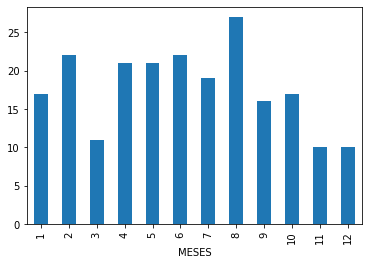

In [60]:
# En que meses se lanzan mas comunmente peliculas que contienen la palabra "horror
f = fecha_lanz
f = f[f.title.str.contains("horror", case=False)]
f.date.dt.month.value_counts().sort_index().plot(kind = "bar")
plt.xlabel("MESES")


In [133]:
e = elenco
#e = e[e.name == "Denzel Washington"]
e = e[e.name == "Salma Hayek"]
e.head()

,title,year,name,type,character,n
2847362,54,1998,Salma Hayek,actress,Anita Randazzo,2.0
2847363,Across the Universe,2007,Salma Hayek,actress,Singing Nurse,66.0
2847364,After the Sunset,2004,Salma Hayek,actress,Lola Cirillo,2.0
2847365,Americano,2011,Salma Hayek,actress,'Lola',6.0
2847366,Ask the Dust,2006,Salma Hayek,actress,Camilla,2.0


In [131]:
f = fecha_lanz
f.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


In [134]:
m = e.merge(f)
m.head()

,title,year,name,type,character,n,country,date
0,54,1998,Salma Hayek,actress,Anita Randazzo,2.0,USA,1998-08-28
1,54,1998,Salma Hayek,actress,Anita Randazzo,2.0,Australia,1998-11-12
2,54,1998,Salma Hayek,actress,Anita Randazzo,2.0,New Zealand,1998-11-26
3,54,1998,Salma Hayek,actress,Anita Randazzo,2.0,Germany,1998-12-10
4,54,1998,Salma Hayek,actress,Anita Randazzo,2.0,Israel,1998-12-10


## Pivot

In [114]:
# Pivot permite el reacomodo de los valores del dataframe, moviendo una columna como 
# indice, otra como llave de datos y otra para los valores

# Ejemplo fechas de lanzamiento de peliculas Harry Potter en Mexico, USA y Canada
fl = fecha_lanz 
fl = fl[fl.title.str.startswith("Harry Potter")]
fl = fl[(fl.country == "Mexico") | (fl.country == "USA") | (fl.country == "Canada")]
fl.head(3)

,title,year,country,date
138430,Harry Potter and the Chamber of Secrets,2002,Canada,2002-11-15
138434,Harry Potter and the Chamber of Secrets,2002,USA,2002-11-15
138452,Harry Potter and the Chamber of Secrets,2002,Mexico,2002-11-29


In [117]:
fl = pd.pivot(data = fl, index="title", columns="country", values="date")
fl

country,Canada,Mexico,USA
title,,,
Harry Potter and the Chamber of Secrets,2002-11-15,2002-11-29,2002-11-15
Harry Potter and the Deathly Hallows: Part 1,2010-11-19,2010-11-18,2010-11-19
Harry Potter and the Deathly Hallows: Part 2,2011-07-15,2011-07-15,2011-07-15
Harry Potter and the Goblet of Fire,2005-11-18,2005-11-18,2005-11-18
Harry Potter and the Half-Blood Prince,2009-07-15,2009-07-15,2009-07-15
Harry Potter and the Order of the Phoenix,2007-07-11,2007-07-12,2007-07-11
Harry Potter and the Prisoner of Azkaban,2004-06-04,2004-06-04,2004-06-04
Harry Potter and the Sorcerer's Stone,2001-11-16,2001-11-30,2001-11-16


In [ ]:
# En que fechas fue lanzada cada pelicula de "Salma Hayek"
# dentro de un periodo de 1990 al presente en Mexico


In [153]:
e = elenco[(elenco.name == "Salma Hayek") & (elenco.year >= 1990)]
f = fecha_lanz[fecha_lanz.country == "Mexico"]
m = e.merge(f)
